# MACD

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf
yf.pdr_override()

In [2]:
def calculate_macd(data, short_window=12, long_window=26, signal_window=9):
    data['Short_MA'] = data['Close'].ewm(span=short_window, adjust=False).mean()
    data['Long_MA'] = data['Close'].ewm(span=long_window, adjust=False).mean()
    data['MACD'] = data['Short_MA'] - data['Long_MA']
    data['Signal_Line'] = data['MACD'].ewm(span=signal_window, adjust=False).mean()
    return data

In [3]:
def backtest_macd_strategy(stock_symbol, start_date, end_date, macd_buy_condition=lambda x: x['MACD'] < 0 and x['MACD'] > x['Signal_Line'],
                            macd_sell_condition=lambda x: x['MACD'] > 0 and x['MACD'] < x['Signal_Line']):
    data = yf.download(stock_symbol, start=start_date, end=end_date)

    data = calculate_macd(data)

    position = 0
    capital = 100000

    buy_signals = []
    sell_signals = []
    profitable_trades = 0

    for i in range(1, len(data)):
        if macd_buy_condition(data.iloc[i]) and position == 0:
            buy_signals.append(data.index[i])
            position = 1
            stocks_bought = capital // data['Close'][i]
            capital -= stocks_bought * data['Close'][i]

        elif macd_sell_condition(data.iloc[i]) and position == 1:
            sell_signals.append(data.index[i])
            if data['Close'][sell_signals[-1]] > data['Close'][buy_signals[-1]]:
                profitable_trades += 1
            position = 0
            capital += data['Close'][i] * stocks_bought

        elif i == len(data) - 1 and position == 1:
            capital += data['Close'][i] * stocks_bought
            sell_signals.append(data.index[i])
            if data['Close'][buy_signals[-1]] < data['Close'][i]:
                profitable_trades += 1

    win_rate = np.NaN
    total_trades = len(buy_signals)
    if total_trades != 0:
        win_rate = (profitable_trades / total_trades) * 100

    capital_buy_and_hold = 100000
    stocks_buy_and_hold = capital_buy_and_hold // data['Close'].iloc[0]
    capital_buy_and_hold -= data['Close'].iloc[0] * stocks_buy_and_hold
    capital_buy_and_hold += data['Close'].iloc[-1] * stocks_buy_and_hold

    return capital, win_rate, capital_buy_and_hold

In [4]:
nifty50 = pd.read_html('https://en.wikipedia.org/wiki/NIFTY_50')[2]['Symbol']
nifty50 = pd.DataFrame({'Symbol': nifty50})
nifty50['Symbol'] = nifty50['Symbol'] + '.NS'

nifty50_list = nifty50['Symbol'].unique().tolist()

start_date = '2023-01-01'
end_date = '2024-01-01'

results = []
for stock_symbol in nifty50_list:
    result = backtest_macd_strategy(stock_symbol, start_date, end_date)
    results.append({'Stock Symbol': stock_symbol, 'Strategy': result[0], 'Win Rate': result[1], 'Buy and Hold': result[2]})

df = pd.DataFrame(results)

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%*******

In [5]:
df.dropna(inplace=True)
df

,Stock Symbol,Strategy,Win Rate,Buy and Hold
0,ADANIENT.NS,56896.497803,50.000000,74201.500000
1,ADANIPORTS.NS,146126.349548,100.000000,124448.048523
2,APOLLOHOSP.NS,112281.285156,100.000000,127494.500000
3,ASIANPAINT.NS,114937.491455,100.000000,111364.796875
4,AXISBANK.NS,100882.347351,33.333333,117034.207764
5,BAJAJ-AUTO.NS,105335.056152,100.000000,187029.101318
6,BAJFINANCE.NS,137326.896484,100.000000,111610.000000
7,BAJAJFINSV.NS,108970.753540,100.000000,108531.203125
8,BPCL.NS,127422.010986,100.000000,134923.196350
9,BHARTIARTL.NS,107104.750000,100.000000,126681.394043


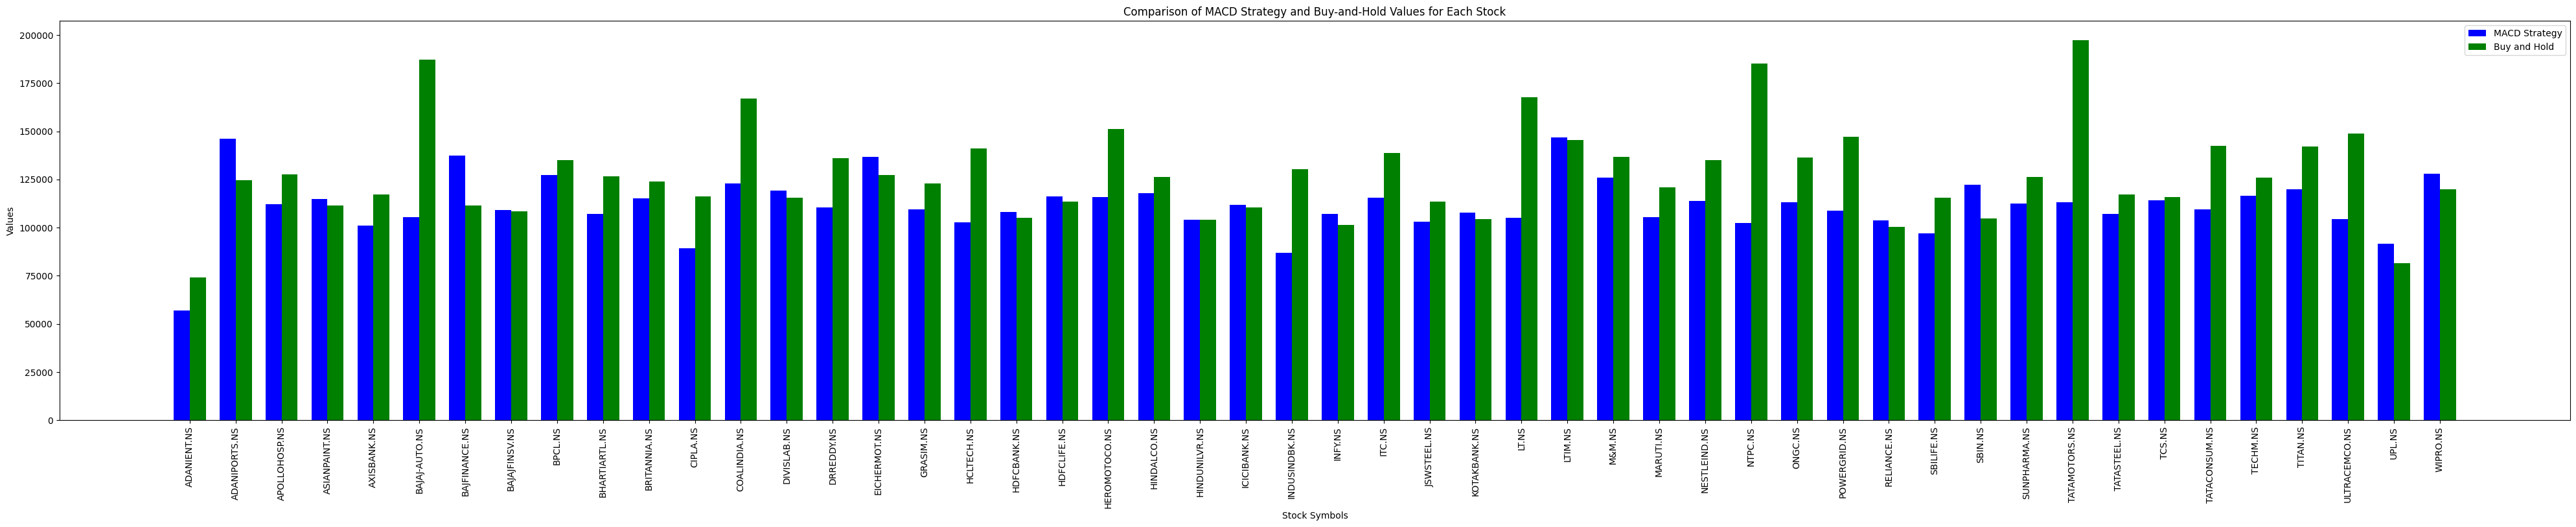

In [6]:
plt.figure(figsize=(50, 8))

bar_width = 0.35
index = np.arange(len(df))

plt.bar(index, df['Strategy'], width=bar_width, color='blue', label='MACD Strategy')
plt.bar(index + bar_width, df['Buy and Hold'], width=bar_width, color='green', label='Buy and Hold')

plt.title('Comparison of MACD Strategy and Buy-and-Hold Values for Each Stock')
plt.xlabel('Stock Symbols')
plt.ylabel('Values')
plt.xticks(index + bar_width / 2, df['Stock Symbol'], rotation=90)
plt.legend()
plt.show()

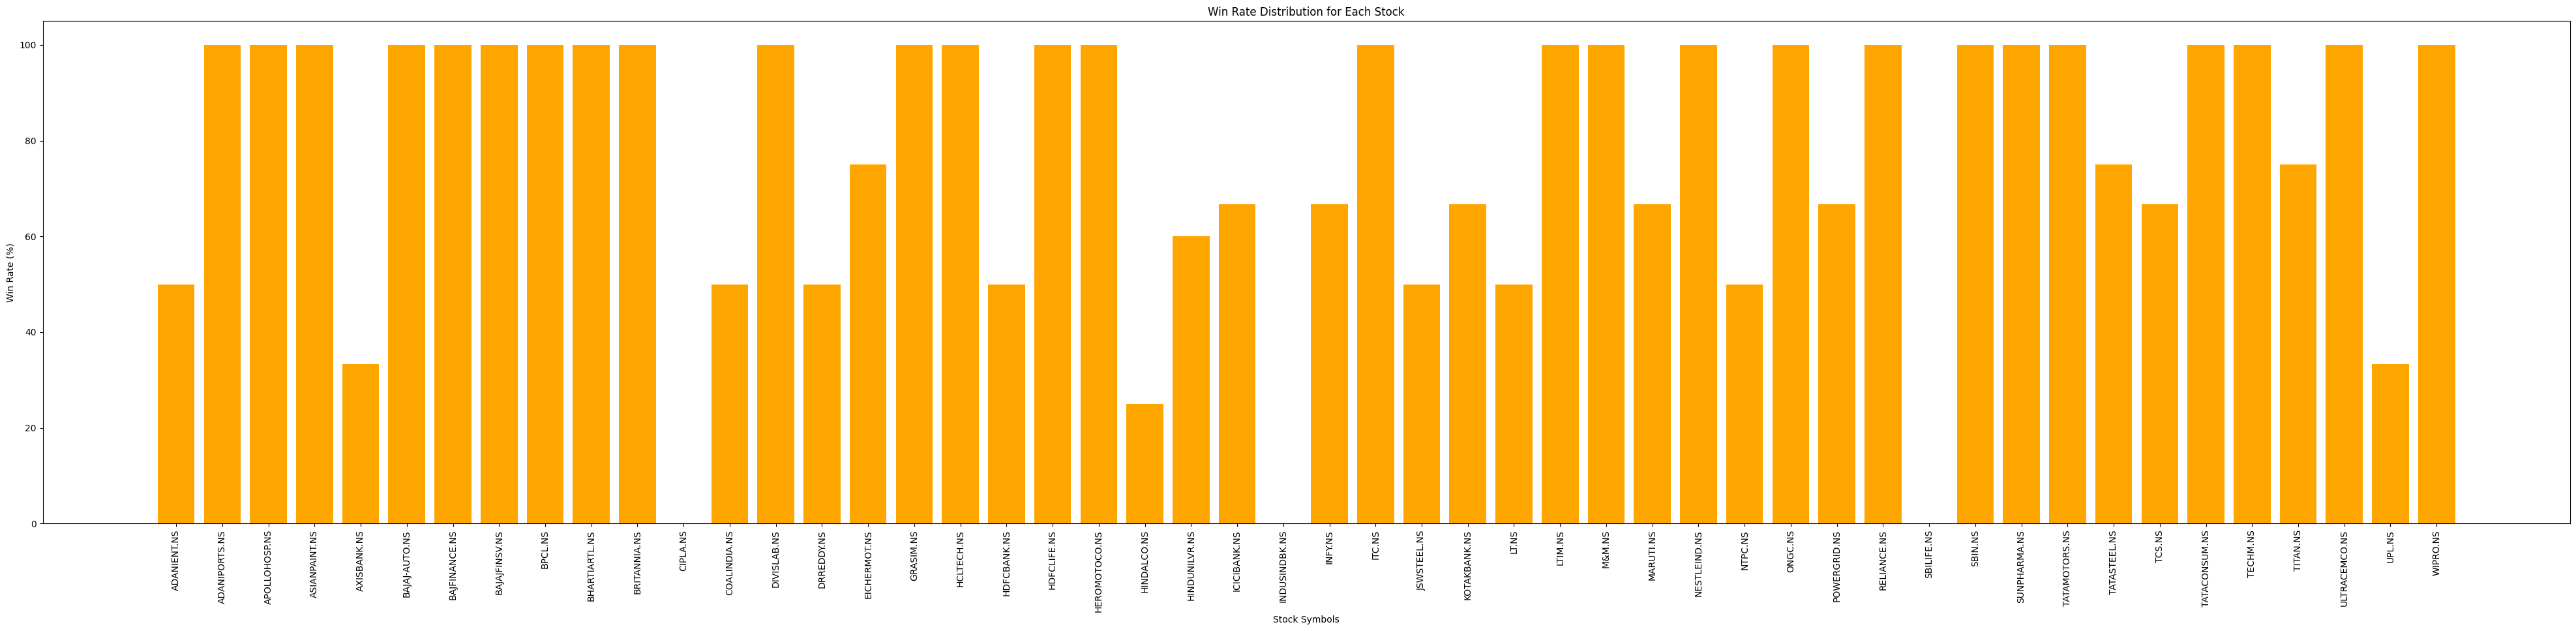

In [7]:
plt.figure(figsize=(50, 10))
plt.bar(df['Stock Symbol'], df['Win Rate'], color='orange')
plt.title('Win Rate Distribution for Each Stock')
plt.xlabel('Stock Symbols')
plt.ylabel('Win Rate (%)')
plt.xticks(rotation=90)
plt.show()

In [8]:
average_win_rate = df['Win Rate'].mean()
print(f"Average Win Rate: {average_win_rate:.2f}")

Average Win Rate: 76.53


In [12]:
initial_capital = 100000
df['Strategy Percentage Return'] = ((df['Strategy'] - initial_capital) / initial_capital) * 100
df['Buy and Hold Percentage Return'] = ((df['Buy and Hold'] - initial_capital) / initial_capital) * 100

average_strategy_percentage_return = df['Strategy Percentage Return'].mean()
average_buy_and_hold_percentage_return = df['Buy and Hold Percentage Return'].mean()

print(f"Average MACD Strategy Percentage Return: {average_strategy_percentage_return:.2f}%")
print(f"Average Buy and Hold Percentage Return: {average_buy_and_hold_percentage_return:.2f}%")

Average MACD Strategy Percentage Return: 11.59%
Average Buy and Hold Percentage Return: 27.68%
